In [2]:
from cpclasses import *


In [3]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [4]:
pos = torch.rand(graph.num_nodes, 2)

print(pos)

torch.mean(pos, axis=0)

tensor([[0.9849, 0.2232],
        [0.7503, 0.5211],
        [0.5843, 0.0367],
        [0.2341, 0.3084],
        [0.5488, 0.2647]])


tensor([0.6205, 0.2708])

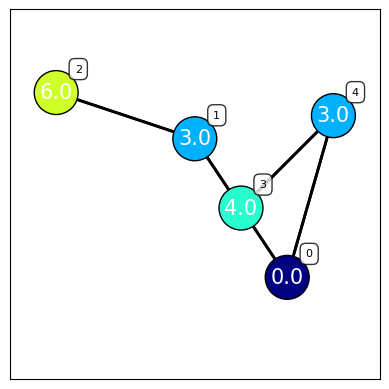

In [5]:
fig, ax = plt.subplots()

draw_graph(graph, ax, color_style='gradient')

save_plot(fig, 'Graph_with_attributes.png', dpi=500)

In [6]:
class CustomMessagePassing(MessagePassing):

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)



In [7]:
gnn1_layer = CustomMessagePassing(aggr='add')
graph.x = gnn1_layer(graph.x, graph.edge_index)
print(gnn1_layer(graph.x, graph.edge_index))


tensor([[10.],
        [ 9.],
        [10.],
        [21.],
        [13.]])


In [8]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3],
                       [0, 0],
                       [1, 1],
                       [2, 2],
                       [3, 3],
                       [4, 4]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [9]:
pos = torch.rand(graph.num_nodes, 2)

print(pos)

torch.mean(pos, axis=0)

tensor([[0.2208, 0.7680],
        [0.9123, 0.2951],
        [0.3145, 0.8947],
        [0.7738, 0.3086],
        [0.2533, 0.2983]])


tensor([0.4949, 0.5129])

In [10]:
gnn1_layer = CustomMessagePassing(aggr='add')
graph.x = gnn1_layer(graph.x, graph.edge_index)
print(graph.x)
print(gnn1_layer(graph.x, graph.edge_index))


tensor([[ 7.],
        [13.],
        [ 9.],
        [10.],
        [ 7.]])
tensor([[24.],
        [32.],
        [22.],
        [37.],
        [24.]])


In [11]:
x = torch.tensor([[0], [3], [6], [4], [3]], dtype=torch.float)
edge_index = np.array([[0, 3],
                       [0, 4],
                       [1, 2],
                       [1, 3],
                       [2, 1],
                       [3, 1],
                       [3, 4],
                       [3, 0],
                       [4, 0],
                       [4, 3],
                       [0, 0],
                       [1, 1],
                       [2, 2],
                       [3, 3],
                       [4, 4]])
edge_index = torch.tensor(edge_index.T, dtype=torch.long)


pos = torch.tensor([[5, 0], [3, 3], [0, 4], [4, 1.5], [6, 3.5]], dtype=torch.float)

graph = Data(x=x, edge_index=edge_index, pos=pos)

print(graph.pos)

tensor([[5.0000, 0.0000],
        [3.0000, 3.0000],
        [0.0000, 4.0000],
        [4.0000, 1.5000],
        [6.0000, 3.5000]])


In [12]:
class CustomMessagePassing(MessagePassing):

    def forward(self, x, edge_index):
        return self.propagate(edge_index, x=x)

gnn_max_layer = CustomMessagePassing(aggr='max')

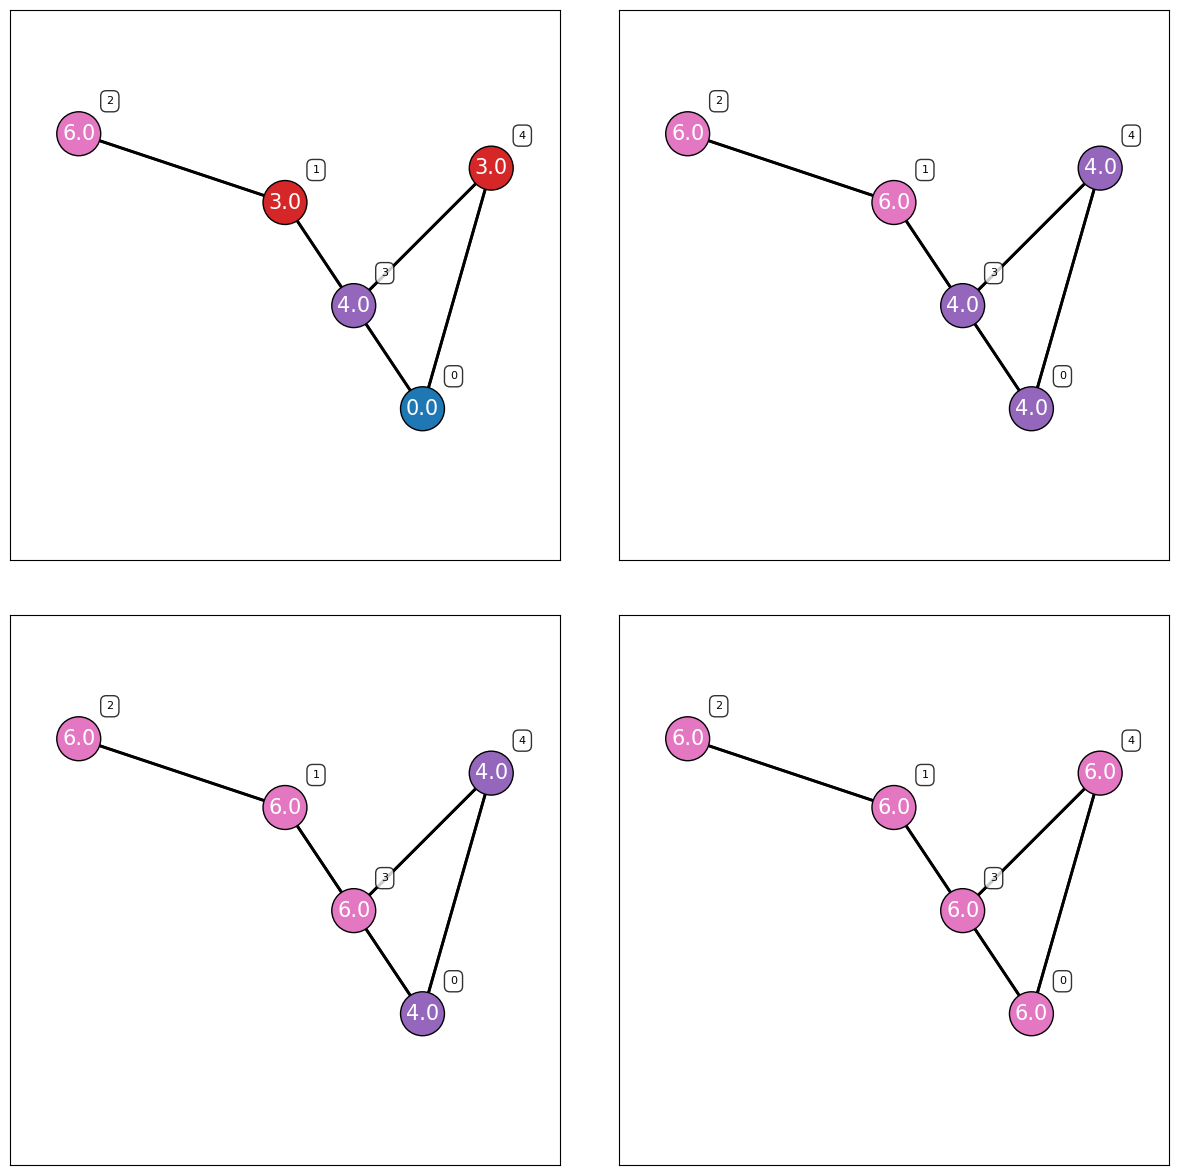

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15), gridspec_kw={'hspace': 0.1, 'wspace': 0.1})

for ax in axs.flatten():
    draw_graph(graph, ax)
    graph.x = gnn_max_layer(graph.x, graph.edge_index)
    ax.set_aspect('equal')


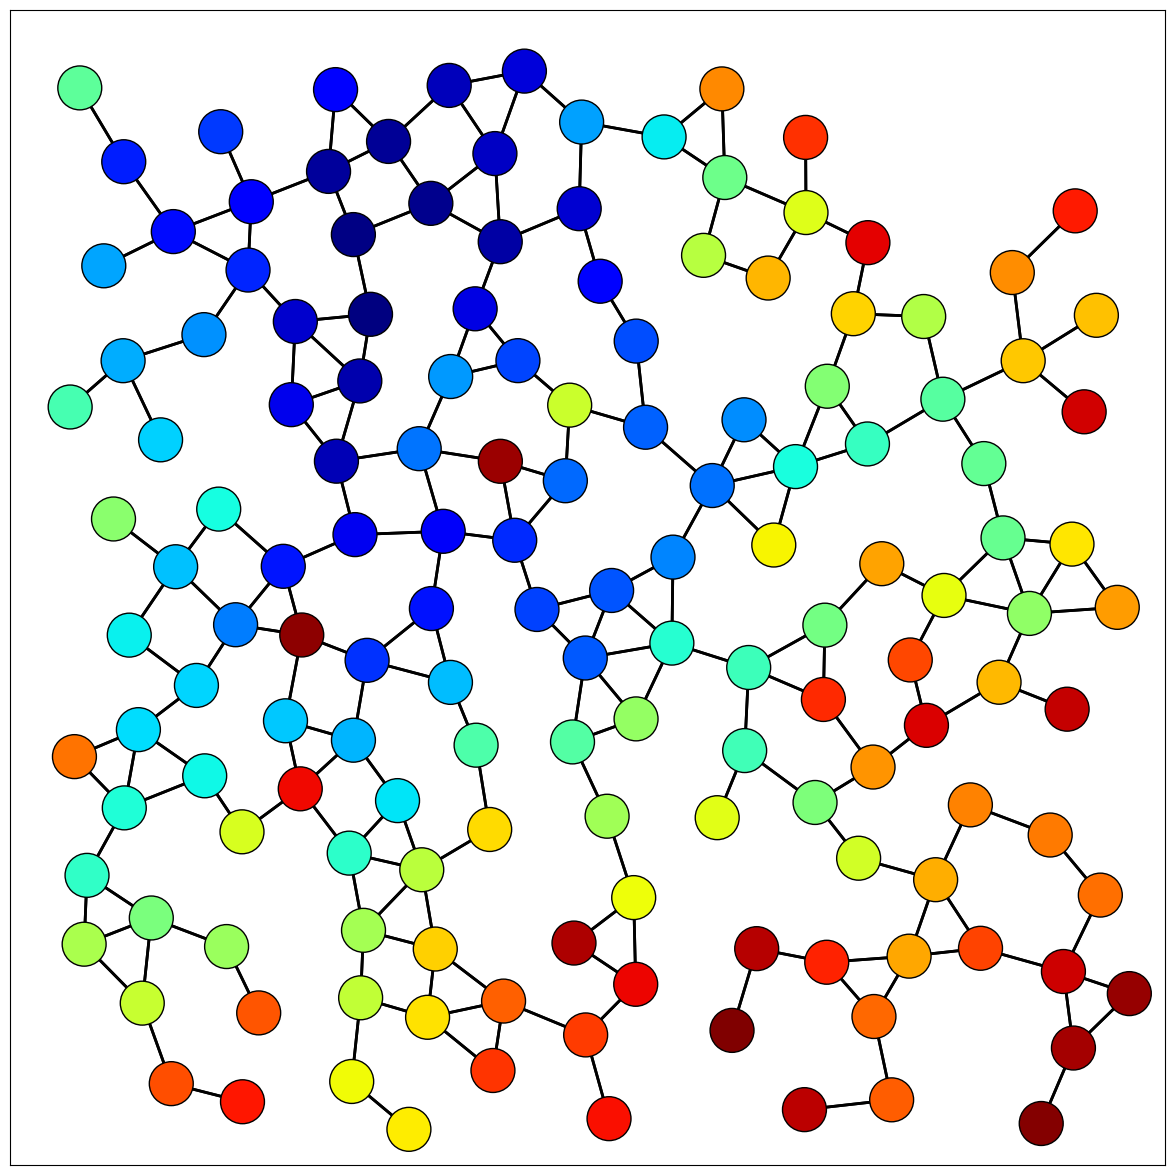

In [ ]:
large_graph = random_graph(150, cutoff=2.5, box_size = 30)



gnn_max_layer = CustomMessagePassing(aggr='max')
feature_range = [np.min(large_graph.x.numpy()), np.max(large_graph.x.numpy())]

fig, ax= plt.subplots(figsize=(15, 15))

draw_graph(large_graph, ax, show_labels=False, color_style='gradient', feature_range=feature_range)
def update(i):
    ax.clear()
    draw_graph(large_graph, ax, show_labels=False, color_style='gradient', feature_range=feature_range)
    large_graph.x = gnn_max_layer(large_graph.x, large_graph.edge_index)
    ax.set_aspect('equal')






In [16]:
large_graph

tensor([[5.5568e+11],
        [3.9774e+11],
        [4.8730e+11],
        [3.9929e+11],
        [3.7553e+11],
        [4.6842e+11],
        [8.8293e+11],
        [1.1423e+12],
        [3.2742e+11],
        [4.5126e+11],
        [7.2144e+11],
        [2.5196e+11],
        [2.9308e+11],
        [4.4679e+11],
        [7.6242e+11],
        [1.2156e+12],
        [1.5820e+12],
        [2.1883e+11],
        [3.1431e+11],
        [1.6409e+11],
        [2.4490e+11],
        [1.4244e+12],
        [1.6198e+12],
        [7.7187e+10],
        [3.9604e+11],
        [1.8164e+12],
        [2.2739e+12],
        [8.9777e+10],
        [2.9069e+12],
        [4.9335e+11],
        [3.1756e+11],
        [4.1903e+12],
        [4.7044e+12],
        [9.5924e+11],
        [1.0033e+12],
        [2.4082e+12],
        [1.2415e+12],
        [1.5938e+12],
        [3.0962e+12],
        [1.2557e+12],
        [1.2482e+11],
        [6.1309e+11],
        [2.2879e+11],
        [7.0489e+10],
        [4.3456e+10],
        [3

In [15]:
from matplotlib.animation import FuncAnimation
ani = FuncAnimation(fig, update, frames=range(15), repeat=False)
save_animation(ani, 'LargeGraphMaxPooling.gif', fps=2)

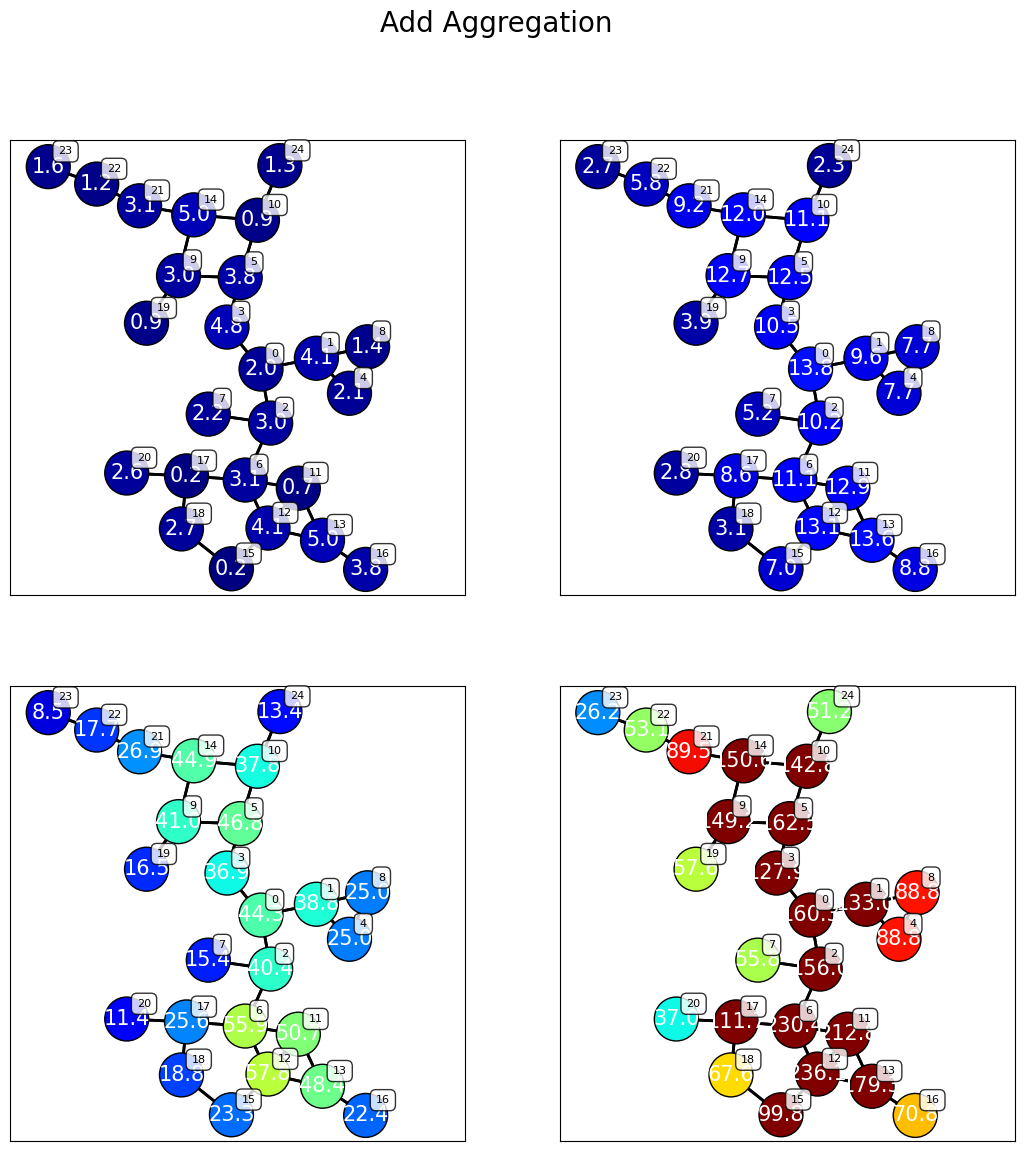

In [42]:
large_graph = random_graph(25, cutoff=2.5, box_size = 30)



gnn_add_layer = CustomMessagePassing(aggr='add')
feature_range = [np.min(large_graph.x.numpy()), 100]

large_graph.x = torch.rand(large_graph.num_nodes, 1) * 5


fig, axs = plt.subplots(2,2, figsize=(13, 13))


for ax in axs.flatten():
    draw_graph(large_graph, ax, show_labels=True, color_style='gradient', feature_range=feature_range)
    large_graph.x = gnn_add_layer(large_graph.x, large_graph.edge_index)

fig.suptitle('Add Aggregation', fontsize=20)

save_plot(fig, 'LargeGraphAddPooling.png')
    






In [46]:


#Remove all self loops:
for i in range(large_graph.edge_index.shape[1]):
    if large_graph.edge_index[0, i] == large_graph.edge_index[1, i]:
        large_graph.edge_index = torch.cat((large_graph.edge_index[:, :i], large_graph.edge_index[:, i+1:]), dim=1)
        break

print(large_graph.edge_index)

tensor([[ 0,  0,  0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  7,  7,  8,  8,  8,  9,  9,  9,  9, 10, 10,
         10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14,
         14, 15, 15, 15, 16, 16, 17, 17, 17, 17, 18, 18, 18, 19, 19, 20, 20, 21,
         21, 21, 22, 22, 22, 23, 23, 24, 24],
        [ 1,  2,  3,  0,  4,  8,  0,  2,  6,  7,  0,  3,  5,  1,  4,  8,  3,  5,
          9, 10,  2,  6, 11, 12, 17,  2,  7,  1,  4,  8,  5,  9, 14, 19,  5, 10,
         14, 24,  6, 11, 12, 13,  6, 11, 12, 13, 15, 11, 12, 13, 16,  9, 10, 14,
         21, 12, 15, 18, 13, 16,  6, 17, 18, 20, 15, 17, 18,  9, 19, 17, 20, 14,
         21, 22, 21, 22, 23, 22, 23, 10, 24]])


tensor([[ 0,  1,  1,  1,  2,  2,  2,  2,  3,  3,  4,  4,  4,  4,  5,  5,  5,  6,
          6,  6,  7,  7,  8,  8,  8,  9, 10, 10, 11, 11, 11, 12, 12, 12, 13, 13,
         13, 14, 14, 14, 15, 16, 17, 18, 18, 18, 19, 19, 20, 21, 21, 22, 23, 24],
        [ 1,  0,  2,  3,  1,  3,  4,  6,  1,  2,  2,  5,  6,  9,  4,  7, 10,  2,
          4,  8,  5, 18,  6, 11, 15,  4,  5, 12,  8, 13, 21, 10, 20, 24, 11, 14,
         16, 13, 17, 19,  8, 13, 14,  7, 21, 22, 14, 23, 12, 11, 18, 18, 19, 12]])


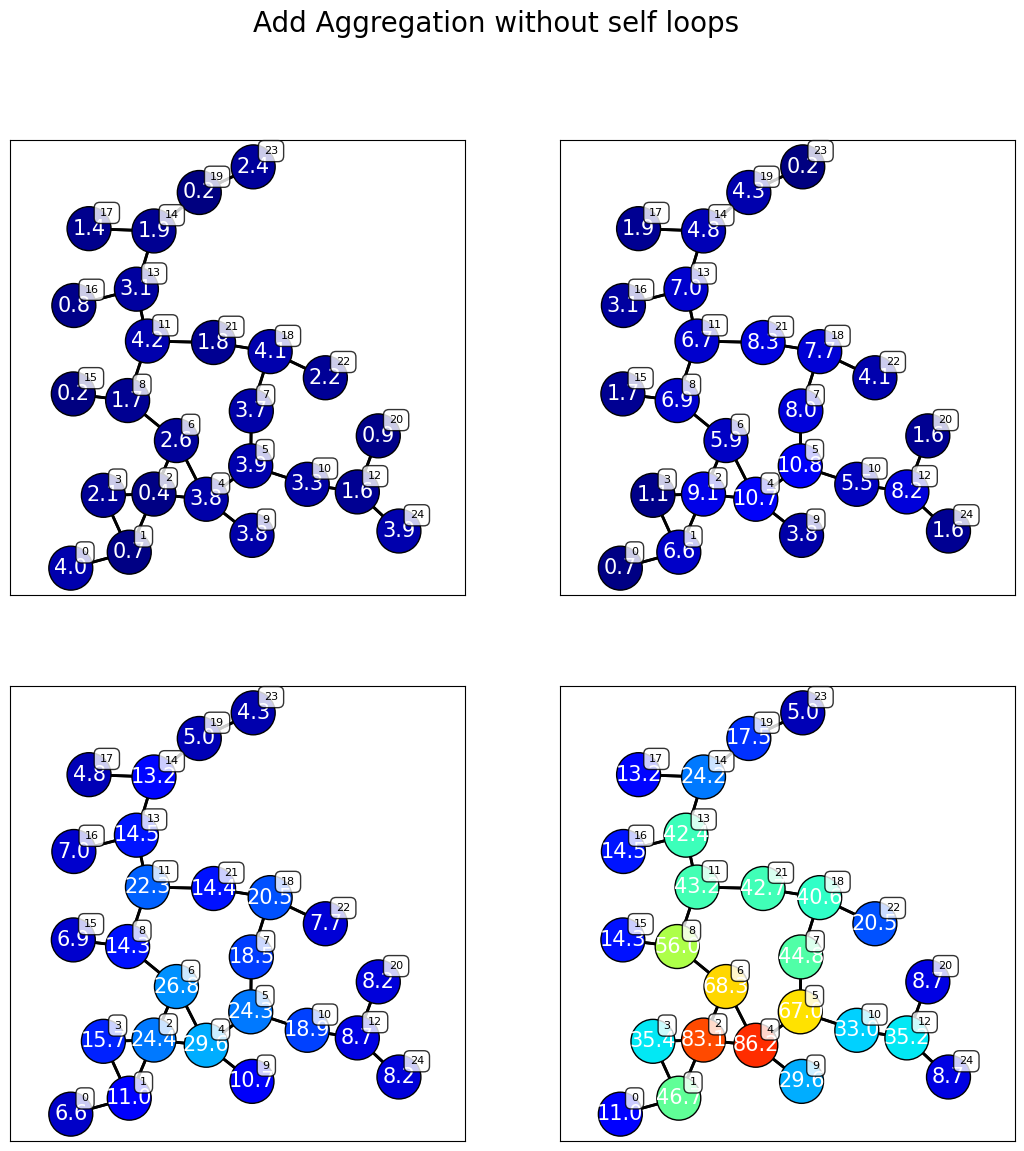

In [50]:
large_graph = random_graph(25, cutoff=2.5, box_size = 30)


#Remove all self loops:
for i in range(large_graph.edge_index.shape[1]):
    for i in range(large_graph.edge_index.shape[1]):
        if large_graph.edge_index[0, i] == large_graph.edge_index[1, i]:
            large_graph.edge_index = torch.cat((large_graph.edge_index[:, :i], large_graph.edge_index[:, i+1:]), dim=1)
            break

print(large_graph.edge_index)

gnn_add_layer = CustomMessagePassing(aggr='add')
feature_range = [np.min(large_graph.x.numpy()), 100]

large_graph.x = torch.rand(large_graph.num_nodes, 1) * 5


fig, axs = plt.subplots(2,2, figsize=(13, 13))


for ax in axs.flatten():
    draw_graph(large_graph, ax, show_labels=True, color_style='gradient', feature_range=feature_range)
    large_graph.x = gnn_add_layer(large_graph.x, large_graph.edge_index)

fig.suptitle('Add Aggregation without self loops', fontsize=20)

save_plot(fig, 'LargeGraphAddPooling, no self loops.png')
    




